<a href="https://colab.research.google.com/github/hrshtmlng/NLP/blob/main/NLP_Classifiaction_Amazon_fine_food_review_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-fine-food-reviews


In [5]:
# Imports
import pandas as pd
import re,string
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

In [4]:
# Dataset preparation
df = pd.read_csv(f"{path}/Reviews.csv")
df = df[['Score','Text']]
df.dropna(inplace=True)
df = df[df['Score'] !=3]
df['Sentiment'] = df['Score'].apply(lambda score: 1 if score > 3 else 0)
df = df[['Text','Sentiment']]

In [6]:
# Text Cleaning

def clean_text(text):
  text = text.lower()
  text = re.sub(f"[{re.escape(string.punctuation)}]","",text)
  text = re.sub(r"\d+","",text)
  text = re.sub(r"\s+"," ",text)
  return text.strip()

df['Clean_Text'] = df['Text'].apply(clean_text)

In [7]:
# Tokenizer
tokenizer = Tokenizer(num_words=1000,oov_token='<OOV>')
tokenizer.fit_on_texts(df['Clean_Text'])
sequences = tokenizer.texts_to_sequences(df['Clean_Text'])
padded = pad_sequences(sequences, maxlen=200)

X = padded
y = df['Sentiment'].values

In [8]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# ANN Model
model =Sequential([
    Embedding(input_dim= 1000,output_dim =16,input_length =200 ),
    GlobalAveragePooling1D(),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])
histroy = model.fit(X_train, y_train, epochs=5,batch_size=512,validation_data=(X_test,y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
822/822 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8410 - loss: 0.4139 - val_accuracy: 0.8781 - val_loss: 0.2751
Epoch 2/5
822/822 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8927 - loss: 0.2561 - val_accuracy: 0.9046 - val_loss: 0.2260
Epoch 3/5
822/822 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9083 - loss: 0.2234 - val_accuracy: 0.9126 - val_loss: 0.2141
Epoch 4/5
822/822 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9122 - loss: 0.2161 - val_accuracy: 0.9072 - val_loss: 0.2267
Epoch 5/5
822/822 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9134 - loss: 0.2127 - val_accuracy: 0.9151 - val_loss: 0.2089


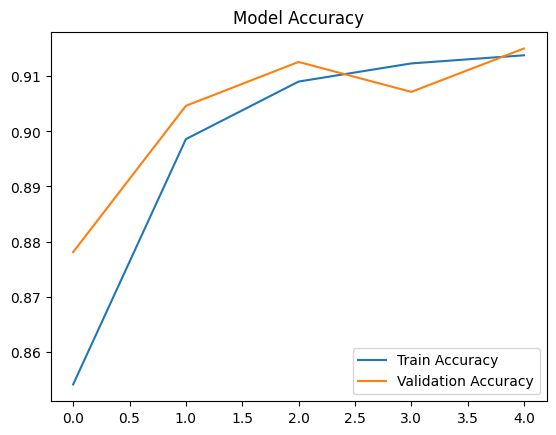

3287/3287 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9155 - loss: 0.2084
Test Accuracy: 0.92


In [11]:
plt.plot(histroy.history['accuracy'], label='Train Accuracy')
plt.plot(histroy.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

In [12]:
def predict_sentiment(text):
    text = clean_text(text)
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=200)
    pred = model.predict(padded_seq)[0][0]
    return "Positive" if pred > 0.5 else "Negative"

# Test
print(predict_sentiment("The food was absolutely delicious!"))
print(predict_sentiment("Worst purchase ever, I regret buying it."))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Positive
